<h2>Financial Analytics</h2>

In [11]:
# pip uninstall -y yfinance
!pip install yfinance==0.2.31

  Using cached yfinance-0.2.31-py2.py3-none-any.whl (65 kB)


In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import yfinance as yf
import statsmodels.api as sm

from scipy.stats import norm

#if compatibity problems force versions
# !pip install scipy==1.7.3
# !pip install numpy==1.22.4

### Histograms with normal distribution plot 
Histograms can be generated using the plt.hist() method. <BR>
A normal distribution curve can be generated using the numpy.linspace() method.

**Get the price data and calculate percent returns**

In [84]:
# define function to get last trading day of year
def last_trading_day(year):
    return (pd.Timestamp(f'{year}-12-31') if pd.Timestamp(f'{year}-12-31').isoweekday() < 6 \
            else pd.Timestamp(f'{year}-12-31') - pd.offsets.BDay(1)).strftime('%Y-%m-%d')

def first_trading_day(year):
    return (pd.Timestamp(f'{year}-01-02') if pd.Timestamp(f'{year}-01-02').isoweekday() < 6 \
        else pd.Timestamp(f'{year}-01-02') - pd.offsets.BDay(-1)).strftime('%Y-%m-%d')

In [89]:
# sample code
tickers = ['VWRA.L', 'TSM', 'AIY.SI']

start_date = last_trading_day(2021)
end_date = first_trading_day(2025)

data1 = yf.download(tickers, start= start_date, end= end_date, auto_adjust=False)
stock_prices = data1[['Adj Close']]
stocks_pct_chg = stock_prices['Adj Close'].pct_change().dropna()

stocks_pct_chg

[*********************100%***********************]  3 of 3 completed


Ticker,AIY.SI,TSM,VWRA.L
Date,,,
2022-01-03,-0.014286,0.070568,0.000000
2022-01-04,0.018116,0.035714,0.004565
2022-01-05,-0.020166,-0.047526,0.000000
2022-01-06,-0.010896,0.011097,-0.016496
2022-01-07,-0.039168,-0.038686,-0.002567
...,...,...,...
2024-12-24,0.000000,-0.004967,0.007620
2024-12-26,-0.005391,-0.015848,0.000000
2024-12-27,0.000000,-0.007042,-0.000428


**Plot the histogram with a normal distribution curve overlay**

Kurtosis
Ticker
AIY.SI    4.800342
TSM       2.422149
VWRA.L    1.704401
dtype: float64


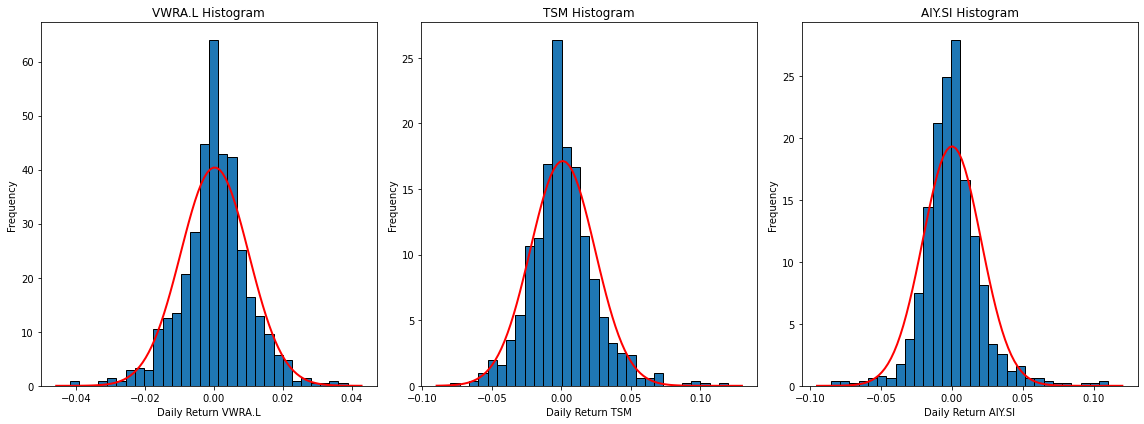

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
bins = 30

# Histogram on first subplot
axes[0].hist(stocks_pct_chg['VWRA.L'], bins=bins, edgecolor='black', density=True)
axes[0].set_title('VWRA.L Histogram')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Frequency')

mu, std = norm.fit(stocks_pct_chg['VWRA.L'])
xmin, xmax = axes[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[0].plot(x, p, 'r', linewidth=2)
axes[0].set_xlabel('Daily Return VWRA.L')


# Histogram on second subplot
axes[1].hist(stocks_pct_chg['TSM'], bins=bins, edgecolor='black', density=True)
axes[1].set_title('TSM Histogram')
axes[1].set_xlabel('Daily Return')
axes[1].set_ylabel('Frequency')

mu, std = norm.fit(stocks_pct_chg['TSM'])
xmin, xmax = axes[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[1].plot(x, p, 'r', linewidth=2)
axes[1].set_xlabel('Daily Return TSM')

# Histogram on third subplot
axes[2].hist(stocks_pct_chg['AIY.SI'], bins=bins, edgecolor='black', density=True)
axes[2].set_title('AIY.SI Histogram')
axes[2].set_xlabel('Daily Return')
axes[2].set_ylabel('Frequency')

mu, std = norm.fit(stocks_pct_chg['AIY.SI'])
xmin, xmax = axes[2].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axes[2].plot(x, p, 'r', linewidth=2)
axes[2].set_xlabel('Daily Return AIY.SI')
print('Kurtosis')
print(stocks_pct_chg.kurt())
plt.tight_layout()
plt.show()

**Let's compare the kurtosis for AAPL for 5 years versus the previous 1 year calculation.**

## Normal Q-Q Plot

To check if distribution is normal

Q-Q plot from statsmodels.api -<br>
https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

Text(0.5, 1.0, 'Normal Q-Q Plot AIY.SI')

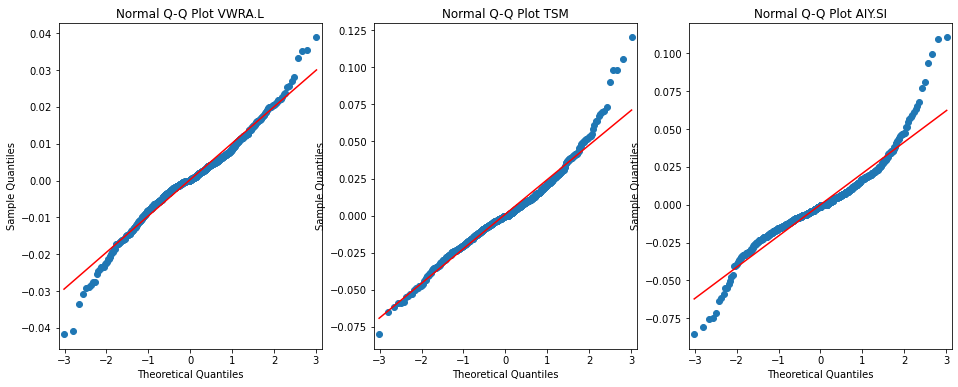

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
sm.qqplot(stocks_pct_chg['VWRA.L'], line = 's', ax=axes[0])
axes[0].set_title('Normal Q-Q Plot VWRA.L')

sm.qqplot(stocks_pct_chg['TSM'], line = 's', ax=axes[1])
axes[1].set_title('Normal Q-Q Plot TSM')

sm.qqplot(stocks_pct_chg['AIY.SI'], line = 's', ax=axes[2])
axes[2].set_title('Normal Q-Q Plot AIY.SI')



## Diversification

Calculate the correlation for each fund against the rest.

In [92]:
pct_returns = stock_prices.pct_change().dropna()
correlation = pct_returns.corr()
print(correlation.round(3))

Price            Adj Close              
Ticker              AIY.SI    TSM VWRA.L
Price     Ticker                        
Adj Close AIY.SI     1.000  0.159  0.255
          TSM        0.159  1.000  0.451
          VWRA.L     0.255  0.451  1.000


### Calculate metrics for each individual fund
  
Peg risk free rate to SGS government bonds

Calculate the following metrics
- annualized return
- annualized volatility
- annualized Sharpe ratio
Use the standard devivation (sqrt of the variance) of the daily percentage returns to calculate the annualized volatility.

In [94]:
# your code here
annual_rate = 0.029  # 2.9% annual rate
trading_days = 252
daily_risk_free = (1 + annual_rate) ** (1 / trading_days) - 1

#annualized returns =
# ARR = (1+period return)^(1/N) - 1) where N = number of years
period_return = (stock_prices.iloc[-1] / stock_prices.iloc[0]) / stock_prices.iloc[0]
arr_2y = (1 + period_return)**(1/2)-1
print('ANNUALIZED RETURNS')
print(arr_2y)

#ann_volatilities = 
ann_hv = np.log(stock_prices / stock_prices.shift(1)).std() * np.sqrt(252)
print('ANNUAL VOLATILITIES')
print(ann_hv)

#Sharpe ratios =
avg_rf_ret = daily_risk_free
pct_returns = stock_prices.pct_change().dropna()
avg_daily_ret = pct_returns.mean()
std_excess_ret = (pct_returns - daily_risk_free).std()
sharpe = ((avg_daily_ret - avg_rf_ret)/std_excess_ret)*np.sqrt(252)
print('SHARPE RATIOS')
print(sharpe)

ANNUALIZED RETURNS
Price      Ticker
Adj Close  AIY.SI    0.054086
           TSM       0.007581
           VWRA.L    0.004968
dtype: float64
ANNUAL VOLATILITIES
Price      Ticker
Adj Close  AIY.SI    0.332095
           TSM       0.371996
           VWRA.L    0.158798
dtype: float64
SHARPE RATIOS
Price      Ticker
Adj Close  AIY.SI   -0.020973
           TSM       0.590311
           VWRA.L    0.236322
dtype: float64


### Calculate portfolio returns
Portfolio 1: 50% SPY and 50% TLT <br>

Create a combined portfolio of 50/50 mix.

In [33]:
# sample code

# start with percent returns series
pct_returns = stock_prices2.pct_change().dropna()

#  check the order of the columns
pct_returns.columns

Index(['EFA', 'SPY', 'TLT'], dtype='object')

In [34]:
# sample code

# define portfolio weights
# this corresponds to order of the columns in the returns df
# 'EFA', 'SPY', 'TLT'
portfolio_weights = [0, 0.5, 0.5] 

# apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

# add up the 50/50 column returns into single column
portfolio_returns1 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns1.rename(columns={portfolio_returns1.columns[0]:'Portfolio'}, inplace= 'True')
portfolio_returns1

,Portfolio
Date,
2020-01-02,0.010323
2020-01-03,0.003914
2020-01-06,-0.000932
2020-01-07,-0.003864
2020-01-08,-0.000641
...,...
2021-12-27,0.008288
2021-12-28,-0.002390
2021-12-29,-0.004823


### Calculate metrics for Portfolio 1: 50% SPY and 50% TLT
  Assume daily risk free rate of 0.0001
  
  Calculate the following metrics for the 50/50 SPY/TLT portfolio
  - annualized return
  - annualized volatility
  - Sharpe ratio
  - kurtosis

In [70]:
# your code here

#hint: generate the cumlative return to determine the period return
#annualized return =
period_return = ((portfolio_returns1+1).cumprod() - 1).iloc[-1]
arr = (1 + period_return)**(1/2)-1
print('ANNUALIZED RETURNS')
print(arr['Portfolio'])

#ann_volatility = 
ann_hv = (np.log(1 + portfolio_returns1).std() * np.sqrt(252))
print('ANNUAL VOLATILITY')
print(ann_hv['Portfolio'])

#Sharpe ratio =
daily_risk_free = 0.0001
avg_rf_ret = daily_risk_free
avg_daily_ret = portfolio_returns1.mean()
std_excess_ret = (portfolio_returns1 - daily_risk_free).std()
sharpe = ((avg_daily_ret - avg_rf_ret)/std_excess_ret)*np.sqrt(252)
print('SHARPE RATIO')
print(sharpe['Portfolio'])

#kurtosis =
kurtosis = portfolio_returns1.kurt()
print('KURTOSIS')
print(kurtosis)

ANNUALIZED RETURNS
0.1641198903351293
ANNUAL VOLATILITY
0.12310427040495651
SHARPE RATIO
1.0930769356395762
KURTOSIS
Portfolio    10.544796
dtype: float64


**DIY Q3:**<br>
  How do the metrics compare between the portfolio and its component funds?

<b> The portfolio has a greater return, has lower volatility and which Sharpe ratio falls under the Acceptable - Good range of between 1 and 1.99. Its components have less return, higher volatility and their Sharpe ratio falls under the 'Not Good' range of below 1. </b>

### Calculate metrics for Portfolio 2: 50% SPY and 50% EFA
  Assume daily risk free rate of 0.0001
  
  Calculate the following metrics for the 50/50 SPY/EFA portfolio
  - annualized return
  - annualized volatility
  - annualized Sharpe ratio
  - kurtosis

In [73]:
# your code here
pct_returns = stock_prices2.pct_change().dropna()
portfolio_weights = [0.5, 0.5, 0] 
wt_portfolio_ret = pct_returns * portfolio_weights
portfolio_returns2 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns2.rename(columns={portfolio_returns2.columns[0]:'Portfolio'}, inplace= 'True')

#annualized return =
period_return = ((portfolio_returns2+1).cumprod() - 1).iloc[-1]
arr = (1 + period_return)**(1/2)-1
print('ANNUALIZED RETURNS')
print(arr['Portfolio'])

#ann_volatility = 
ann_hv = (np.log(1 + portfolio_returns2).std() * np.sqrt(252))
print('ANNUAL VOLATILITY')
print(ann_hv['Portfolio'])

#Sharpe ratio =
daily_risk_free = 0.0001
avg_rf_ret = daily_risk_free
avg_daily_ret = portfolio_returns2.mean()
std_excess_ret = (portfolio_returns2 - daily_risk_free).std()
sharpe = ((avg_daily_ret - avg_rf_ret)/std_excess_ret)*np.sqrt(252)
print('SHARPE RATIO')
print(sharpe['Portfolio'])

#kurtosis =
kurtosis = portfolio_returns2.kurt()
print('KURTOSIS')
print(kurtosis)

ANNUALIZED RETURNS
0.16419336646188265
ANNUAL VOLATILITY
0.2422739351506494
SHARPE RATIO
0.6486500997261821
KURTOSIS
Portfolio    14.342676
dtype: float64


### Calculate metrics for Portfolio 3: 1/3 in SPY, 1/3 in TLT, 1/3 in EFA
  Assume daily risk free rate of 0.0001

  Calculate the following metrics for the portfolio
  - annualized return
  - annualized volatility
  - annualized Sharpe ratio
  - kurtosis


In [74]:
# your code here
pct_returns = stock_prices2.pct_change().dropna()
portfolio_weights = [1/3, 1/3, 1/3] 
wt_portfolio_ret = pct_returns * portfolio_weights
portfolio_returns3 = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns3.rename(columns={portfolio_returns3.columns[0]:'Portfolio'}, inplace= 'True')

#annualized return =
period_return = ((portfolio_returns3+1).cumprod() - 1).iloc[-1]
arr = (1 + period_return)**(1/2)-1
print('ANNUALIZED RETURNS')
print(arr['Portfolio'])

#ann_volatility = 
ann_hv = (np.log(1 + portfolio_returns3).std() * np.sqrt(252))
print('ANNUAL VOLATILITY')
print(ann_hv['Portfolio'])

#Sharpe ratio =
daily_risk_free = 0.0001
avg_rf_ret = daily_risk_free
avg_daily_ret = portfolio_returns3.mean()
std_excess_ret = (portfolio_returns3 - daily_risk_free).std()
sharpe = ((avg_daily_ret - avg_rf_ret)/std_excess_ret)*np.sqrt(252)
print('SHARPE RATIO')
print(sharpe['Portfolio'])

#kurtosis =
kurtosis = portfolio_returns3.kurt()
print('KURTOSIS')
print(kurtosis)

ANNUALIZED RETURNS
0.14497981758790401
ANNUAL VOLATILITY
0.14739344878468455
SHARPE RATIO
0.8243772664687948
KURTOSIS
Portfolio    14.166166
dtype: float64


**DIY Q4:**<br>
- Which portfolio has the highest return? <b> SPY 50% and EFA 50%</b>
- Which portfolio has the lowest volatility? <b> SPY 50% and TLT 50% </b>
- Which portfolio has the highest Sharpe ratio? <b> SPY 50% and TLT 50% </b>

### Create a better portfolio
Come up with different weighting that has a higher Sharpe ratio than all the other portfolios.

Assume daily risk free rate of 0.0001


In [101]:
#your code here

pct_returns = stock_prices2.pct_change().dropna()
portfolio_weights = [0, 0.54, 0.46] 

# apply the weights to returns
wt_portfolio_ret = pct_returns * portfolio_weights

# add up the 50/50 column returns into single column
portfolio_returns = pd.DataFrame(wt_portfolio_ret.sum(axis = 1))
portfolio_returns.rename(columns={portfolio_returns.columns[0]:'Portfolio'}, inplace= 'True')

#Sharpe ratio =
daily_risk_free = 0.0001
avg_rf_ret = daily_risk_free
avg_daily_ret = portfolio_returns.mean()
std_excess_ret = (portfolio_returns - daily_risk_free).std()
sharpe = ((avg_daily_ret - avg_rf_ret)/std_excess_ret)*np.sqrt(252)
print('SHARPE RATIO')
print(sharpe['Portfolio'])


SHARPE RATIO
1.0951628470638288


**DIY Q5:**<br>
- What is the mix you chose and the corresponding Sharpe ratio?
- How did you decide which funds to increase or reduce the weightings?
- Why is adding EFA be poor choice for improving the the RAR of the SPY/TLT portfolio? 


<ul>
<li> 54% SPY and 46% TLT, 1.095</li>
<li> SPY has the highest Sharpe ratio. TLT provides diversification benefits as it is a bond-based ETF (as SPY is a stock-based ETF), but has a very low Sharpe ratio. Hence, I increased SPY's % little by little until the Sharpe ratio reached a peak of 1.095. </li>        
<li> Although EFA's Sharpe ratio is higher than TLT, EFA is a stock-based ETF just like SPY which adds to the risk if the stock market underperforms and would therefore have a weaker risk-adjusted return. </li>        
</ul>
